# Short term variations

## Introduction

I present here some preliminary results aimed at finding short time scale absorption line variations (~ minutes) likely caused by fast moving excomets close to the star (a few stellar radii). I have chosen to look at the far-UV SiIV doublet at 1394 and 1403 Å, because the exocometary variatons are evident, and the S/N is high for these lines, compared to other lines in the spectra. My hypothesis is that the emission originates from exocomets close to the star where the conditions for highly ionising Si are met.

## Aim
The aim is to look for short term variations. For this, I look at data taken during a single visit. In order to become sensitive to variations on the order of tens of minutes I have to divide the data into datasets of shorter exposuretimes. Fortunately this data is already available from the pipeline in fhe form of sumN.fits files, where N is an integer. I have been working with the \*sum[1..4].fits files where the average(*sum1.fits, *sum2.fits, *sum3.fits, *sum4.fits) = *sum.fits. This has the advantage that we have 4 times the number of spectra for a given visit at the cost of ~1/4 the exposure time.

### Please note

The notebook will not work until you have made edits the follwoing edits to the ```params.json``` file:

```"filesnames" : {
     "split_files" : "yes",
     "filename_start"  : "l",     
     "filename_end"  : "sum.fits" 
     },```

```"BetaPictoris" : {
     "RV": 20.5,    
     "part": "A"
     },```

You have to run the **load_the_data** notebook first after updating the parameters above. You will also need to have created an exocomet free spectrum.

The dates which support spilt files are:  
    "2017_1": "data/2017-04-23/",  
    "2017_2": "data/2017-06-10/",  
    "2017_3": "data/2017-08-04/",  
    "2017_4": "data/2017-10-21/",  <-- You may want to not run this obs with the other obs. You can run it by itself.  
    "2017_5": "data/2017-11-26/",  
    "2018_1": "data/2018-03-17/",  
    "2018_2": "data/2018-05-09/",

### Load the data into a matrix of arrays

In [1]:
import numpy as np
import json, sys, os

import matplotlib.pyplot as plt
from matplotlib import rc, cm

# get the path of the current directory
path = os.getcwd()
home = os.path.dirname(path)

# Print the repository home directory
print("Repository home directory:",home)

# Add the src folder to the system path
sys.path.append(home+'/src')

# Import the python functions from src
from calculations import Calc, Model, Stats

# We shorten the functions name to make it easier to call the required a functions
c   = Calc()
m   = Model()
s   = Stats()

# Importing parameters from a json file.
with open(home+'/params.json') as param_file:    
   param = json.load(param_file)

# We select part A which is the red end of the spectrum (the other part being B, which is the blue end)
part     = param["BetaPictoris"]["part"]

Repository home directory: /home/pas/science/exocomets


In [2]:
# The structure here is
# DP[visit][orbit][0 = wavelength, 1 = flux, 2 = one sigma uncertainty, 3 = datetime]
if param["filenames"]["split_files"] == "yes":
    DP   = c.LoadData(home+'/data/Dnsn_'+part+'_split.npz')
else:
    DP   = c.LoadData(home+'/data/Dnsn_'+part+'.npz')
    
ECF   = c.LoadData(home+'/data/ECF_'+part+'.npz')
ECF_err   = c.LoadData(home+'/data/ECF_'+part+'_err.npz')

Let's have a look at when the spectra were obtained

## Inspecting the data

We start off by making a plot which compares the observations done during each orbit to an exocomet free spectrum for the SiIV doublet.

In [3]:
# Setting the parameters for the plots
plotting_params = {'backend': 'wxAgg',
                   'font.family': 'serif',
                   'font.size': 22,
                   'lines.markersize' : 2,
                   'axes.labelsize': 22,
                   'legend.fontsize': 22,
                   'xtick.labelsize': 22,
                   'ytick.labelsize': 22,
                   'text.usetex': True}

plt.rcParams.update(plotting_params)

Text(0, 0.5, 'Flux [erg/s/cm$^2$/\\AA]')

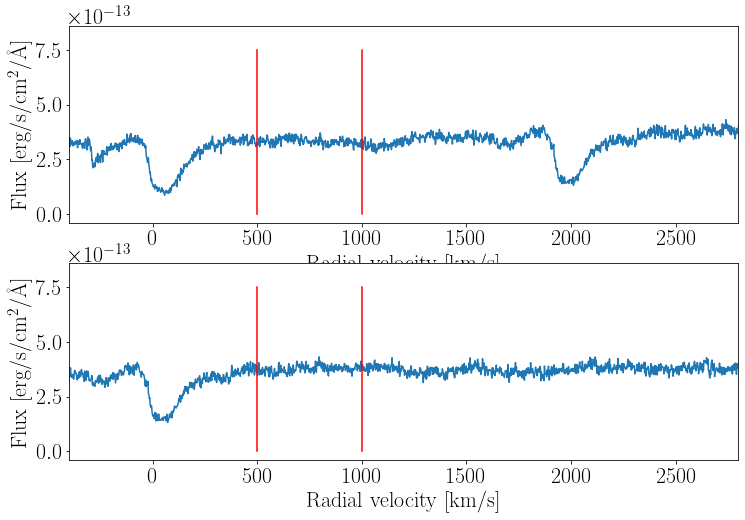

In [4]:
# Parameters to be put into params.json
Line1 = 1393.7550 # The first SiIV line
Line2 = 1402.7700 # The second SiIV line

# Selecting a region for determening the baseline (normalsation region).
n1 = 500  # km/s
n2 = 1000 # km/s

# Convert to RV space (using beta Pic RV of 20.5 km/s as reference)
fig = plt.figure(figsize=(12.0,8.0))
ax1 = plt.subplot(211)
rv = c.Wave2RV(DP[0][0][0],Line1,20.5)
plt.plot(rv,DP[0][0][1])
plt.plot([n1,n1],[0,7.5e-13],'r')
plt.plot([n2,n2],[0,7.5e-13],'r')
plt.xlim(-400,2800)
plt.xlabel(r'Radial velocity [km/s]')
plt.ylabel(r'Flux [erg/s/cm$^2$/\AA]')

ax1 = plt.subplot(212)
rv = c.Wave2RV(DP[0][0][0],Line2,20.5)
plt.plot(rv,DP[0][0][1])
plt.plot([n1,n1],[0,7.5e-13],'r')
plt.plot([n2,n2],[0,7.5e-13],'r')
plt.xlim(-400,2800)
plt.xlabel(r'Radial velocity [km/s]')
plt.ylabel(r'Flux [erg/s/cm$^2$/\AA]')


Looking at observations done on:

 2017-04-22

 2017-06-10

 2017-08-04

 2017-10-20

 2017-11-26

 2018-03-17

 2018-05-09


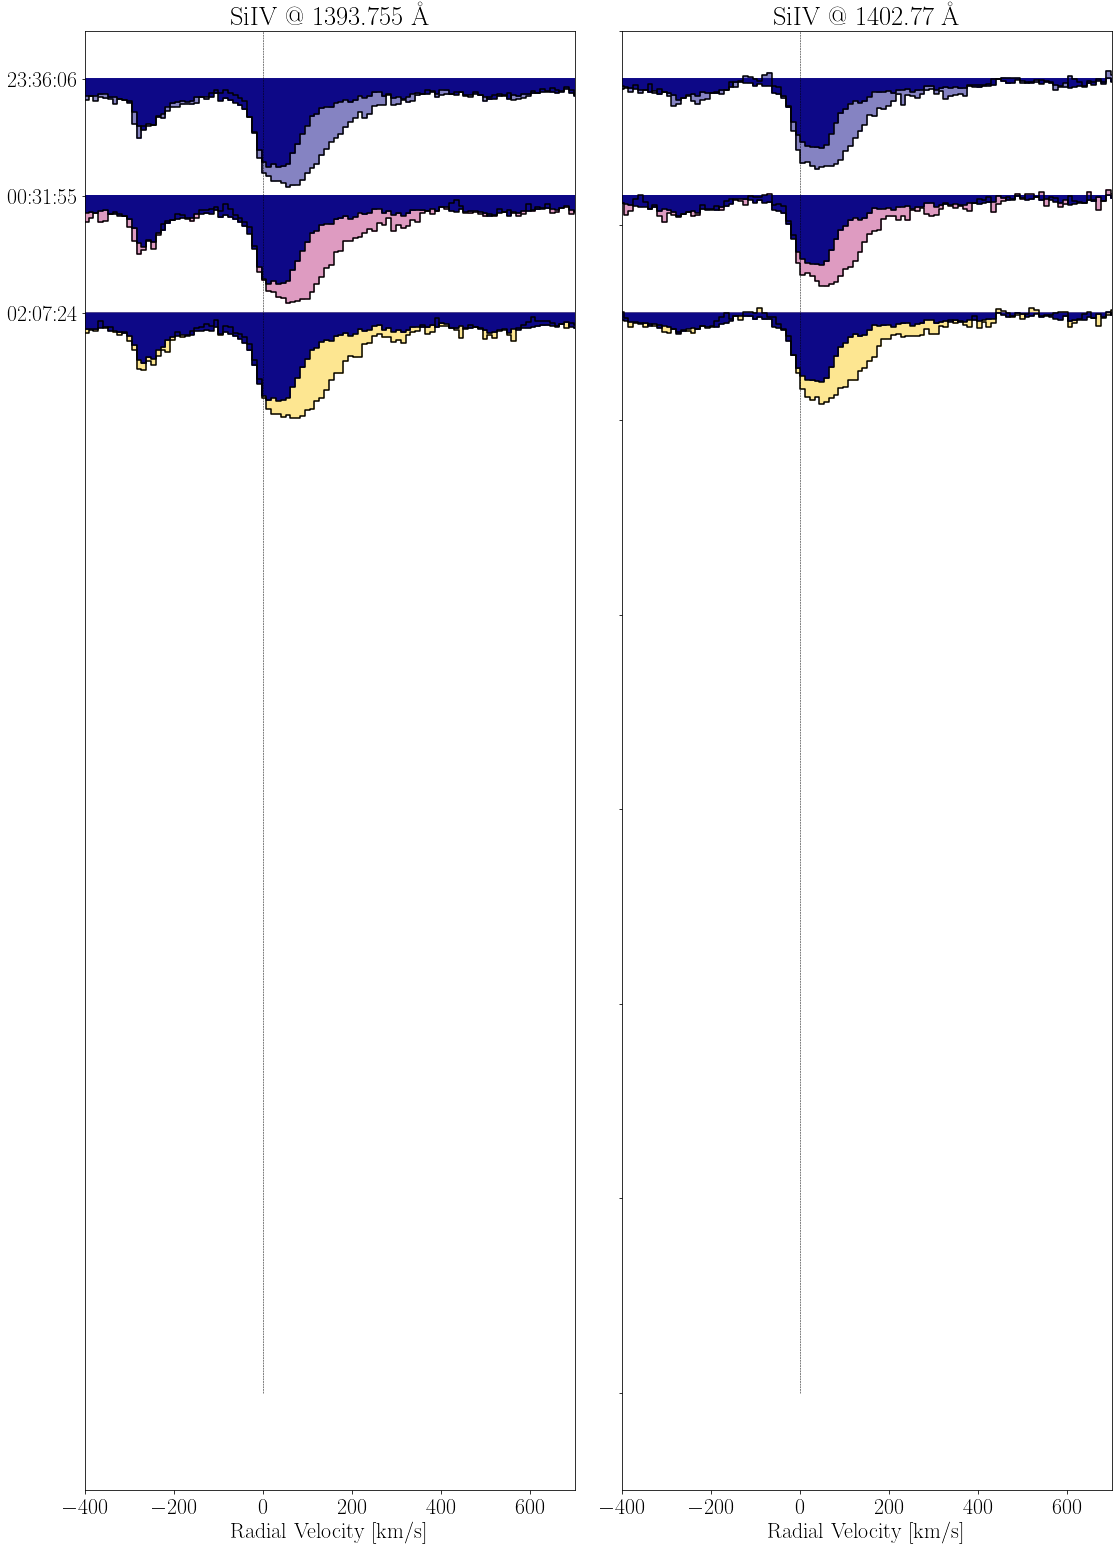

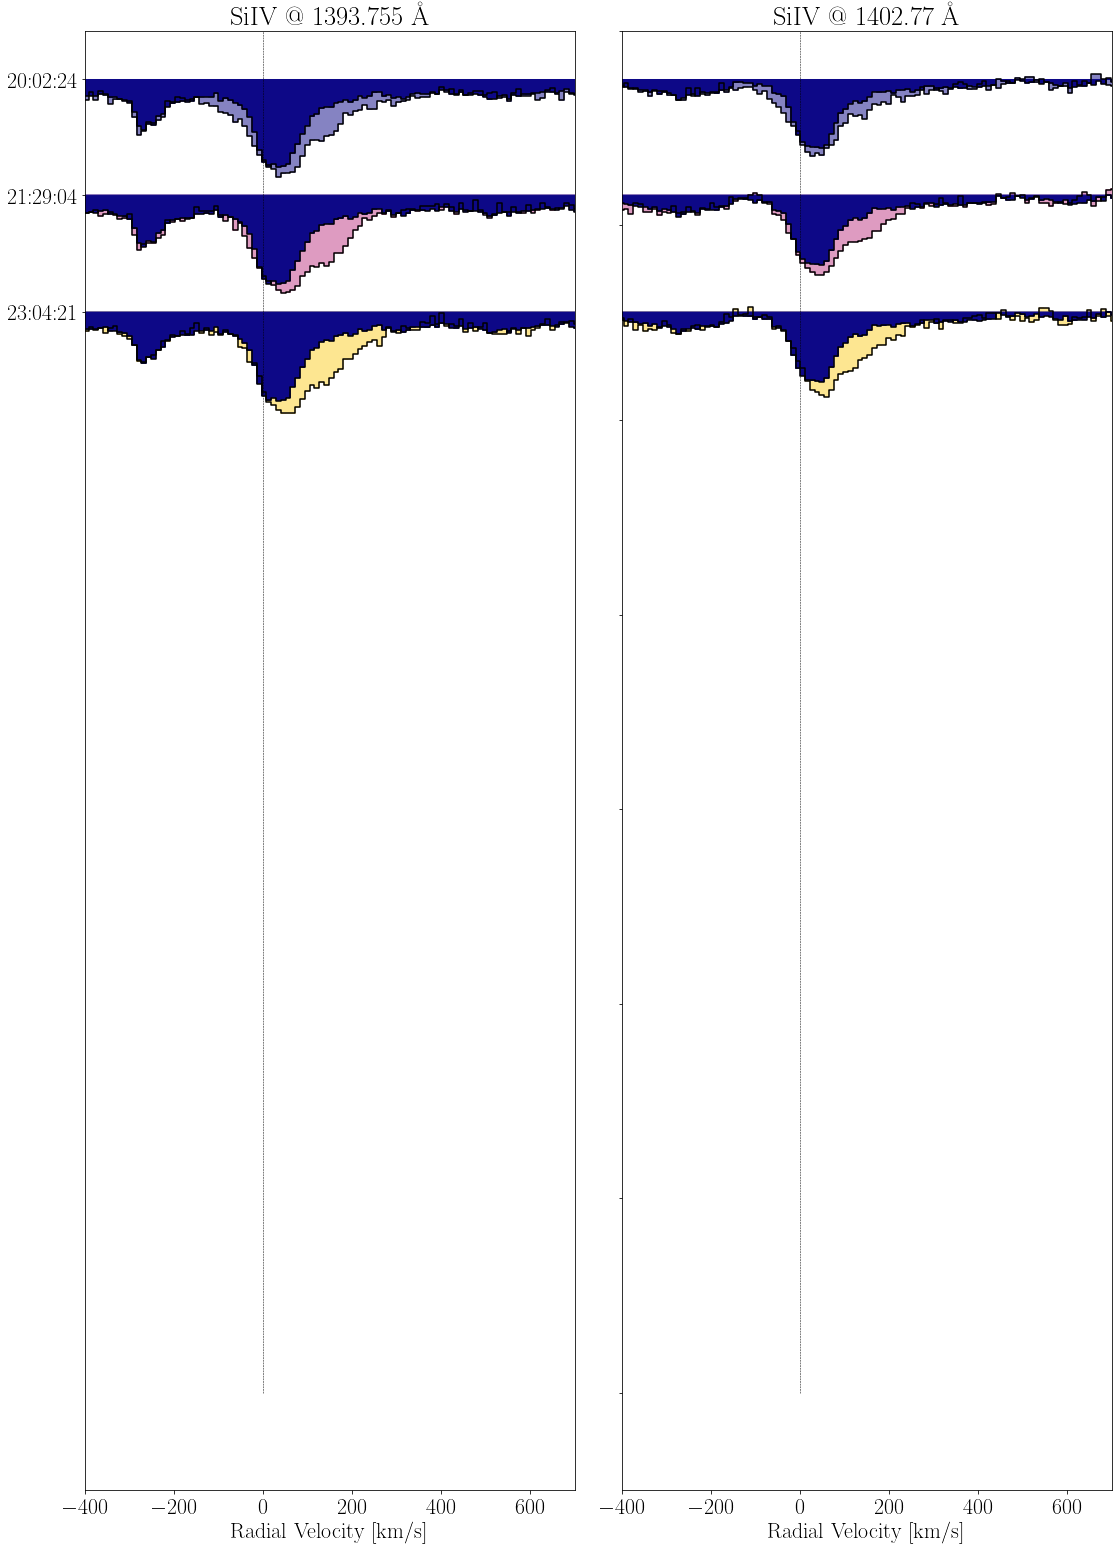

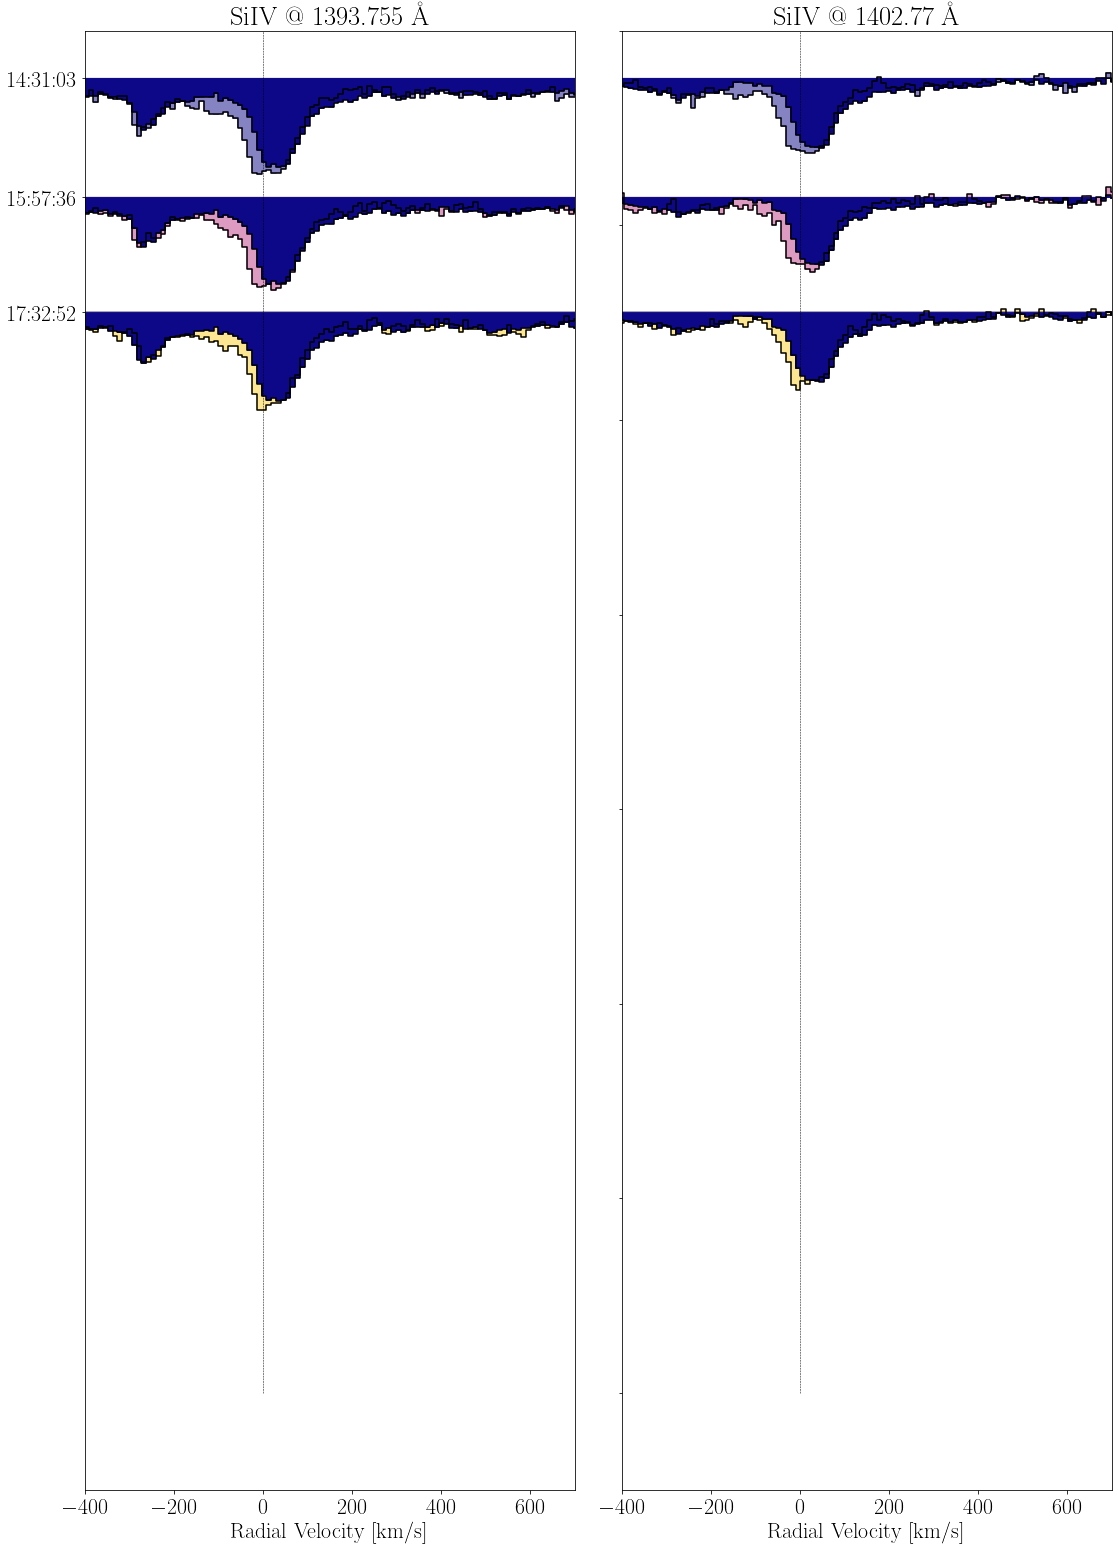

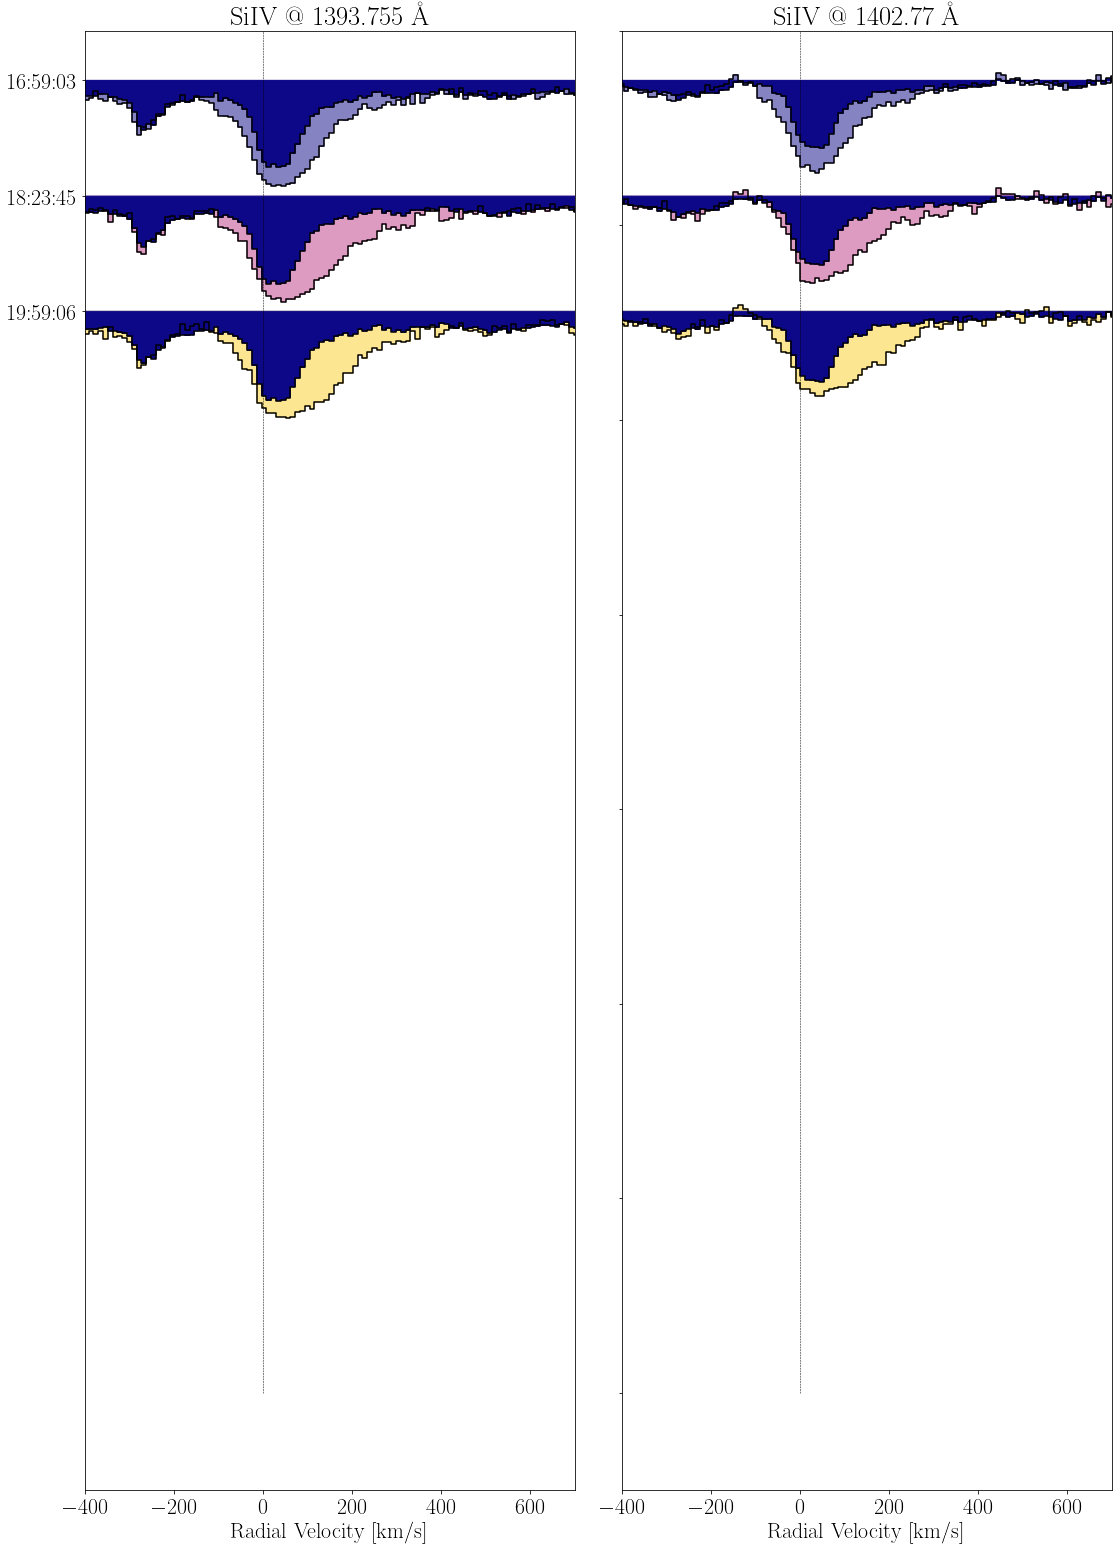

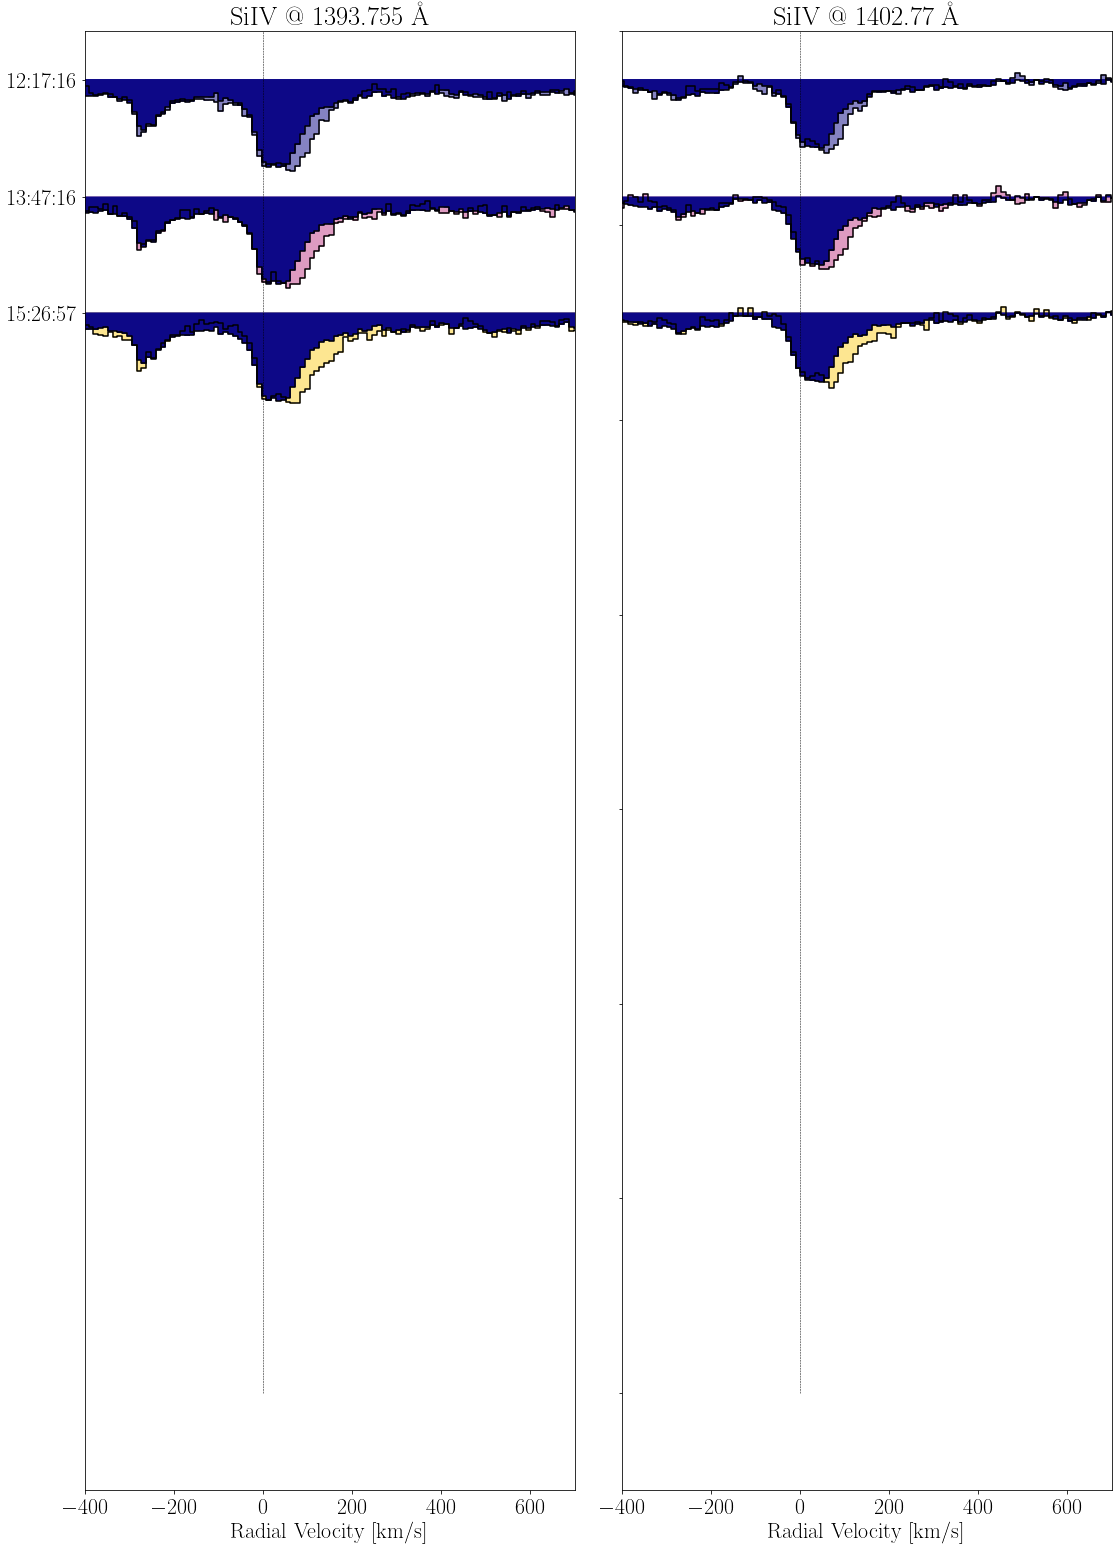

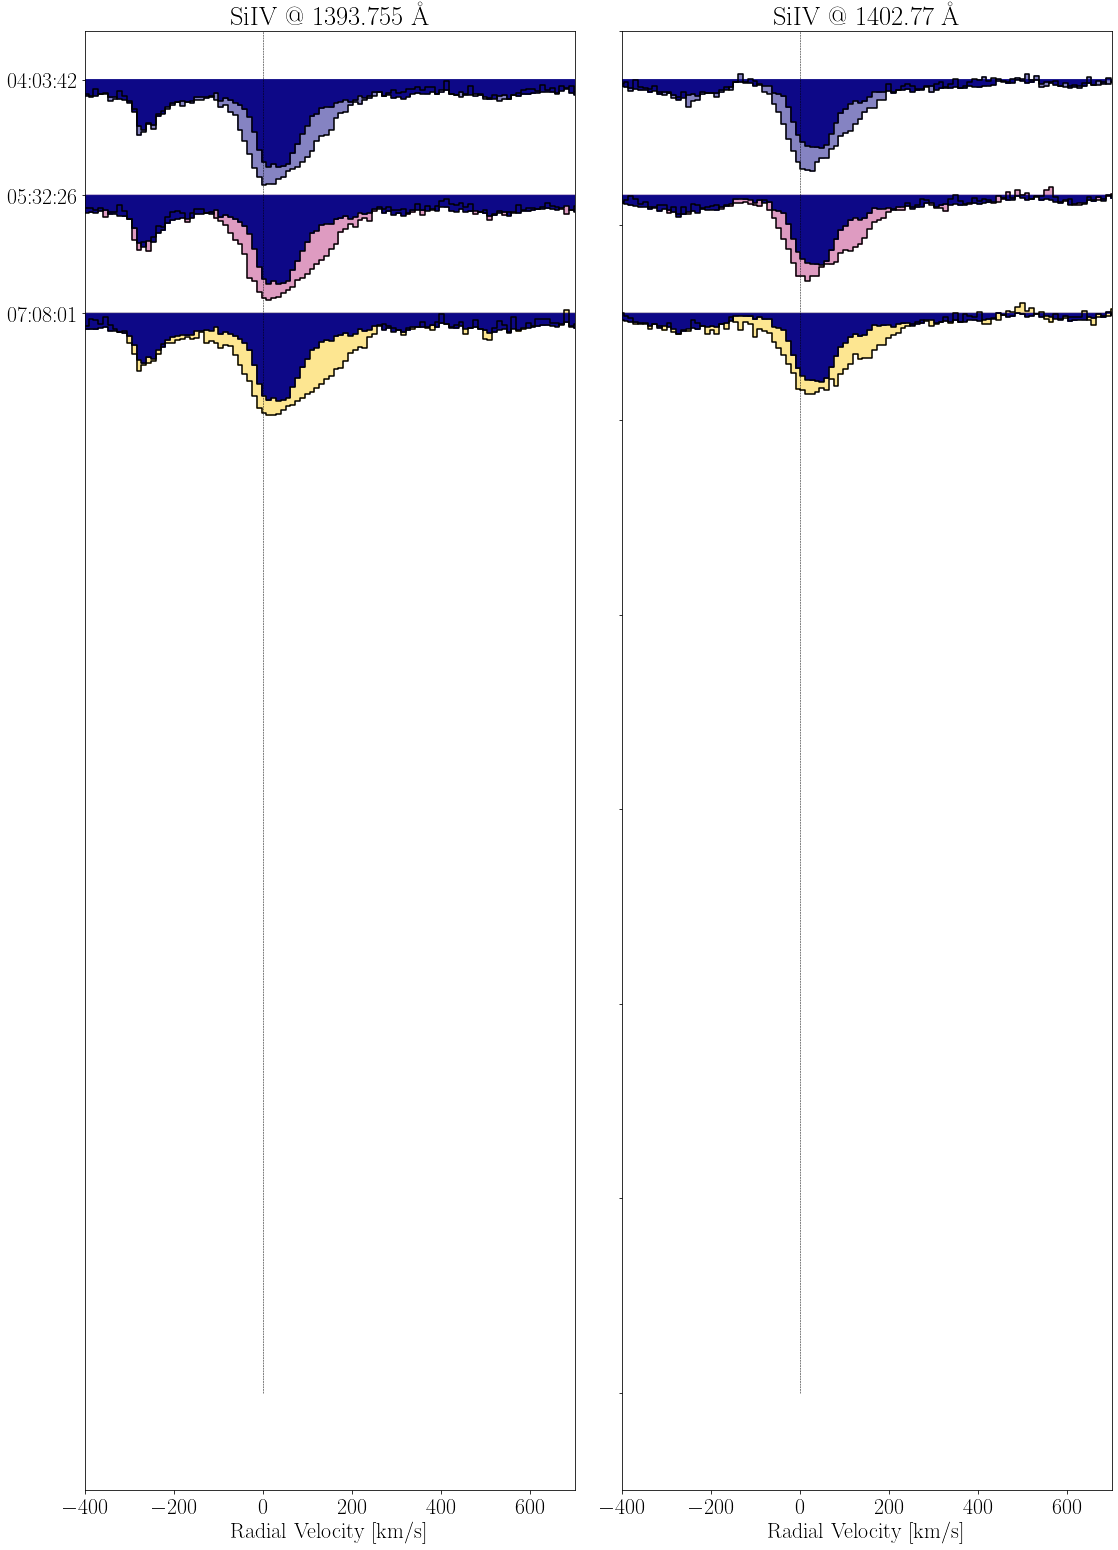

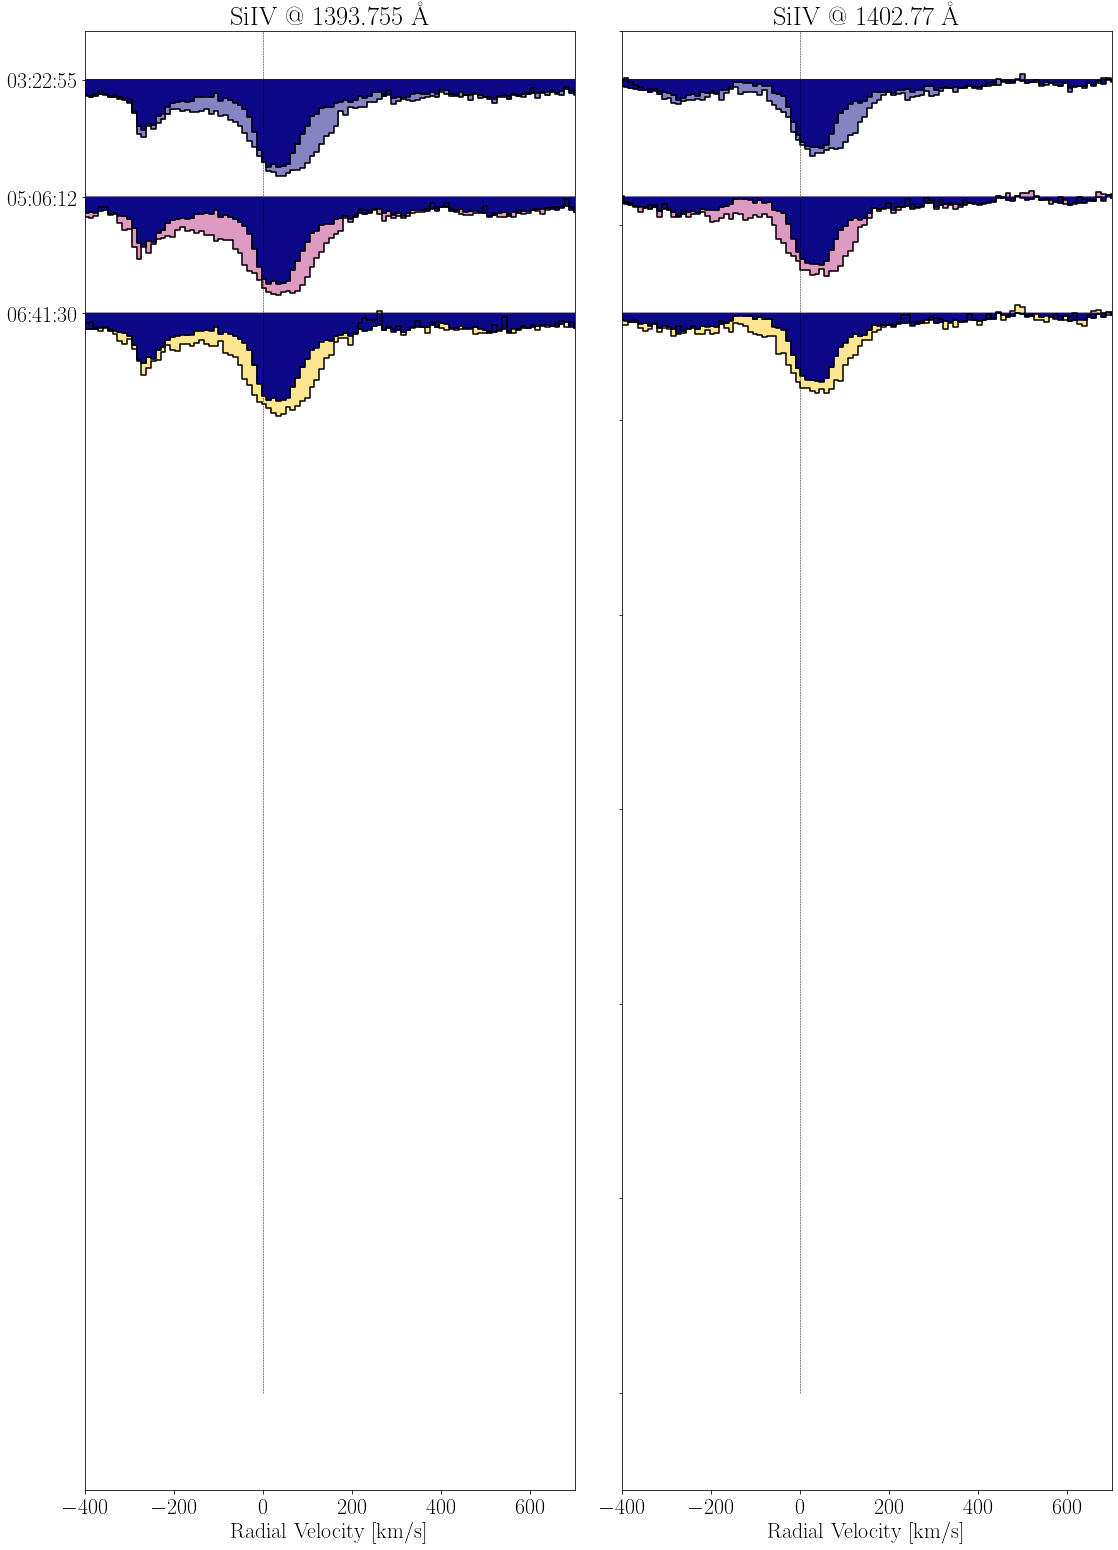

In [23]:
print('Looking at observations done on:')

bin_size = 5 # Only for visualisation. Never used for calculation.

if param["filenames"]["split_files"] == "yes":
    cool=cm.plasma(np.linspace(0.0,0.9,12)) # Create some nice colours for the plot
else:
    cool=cm.plasma(np.linspace(0.0,0.9,3)) # Create some nice colours for the plot

lines = [1393.7550, 1402.7700]

# Find the array element corresponding to n1 and n2 km/s
s1, s2 = c.RegionSelect(rv, n1, n2)

# In this plot we want to compare each observation to the exocomet free spectrum:


# We loop over all the visits given in params.json
for nobs in range(len(DP)):

    # We extract the date so we can put it on the y-axis of the plot
    date = str(DP[nobs][0][3])[:10]
    
    print('\n',date)

    # We initialise lists used for marking the y-axis
    ticks = []
    times = []
    
    fig = plt.figure(figsize=(16.0,22.0))
    
    # Run a loop over the number of lines being explored.
    # In this case the 1393.7550 and 1402.7700 lines
    for j in range(2):
        
        if j == 0:
            ax1 = plt.subplot(121) # Subplot on the left showing the 1394 Å line.
            rv = c.Wave2RV(DP[0][0][0],lines[j],20.5)
            rv_bin_1, f_bin_1 = c.BinXY(rv,ECF,bin_size)

            # Plot the vertical line at v = 0 km/s
            plt.plot([0,0],[-3.0e-12,0.5e-12],'--k',lw=0.5)

            # We loop over the each spectrum within a visit
            for i in range(len(DP[nobs])):
                # To space out the spectra in the plot we define an offset
                offset = i*3e-13

                # We bin the data for visualisation purposes
                rv_bin, f_bin = c.BinXY(rv,DP[nobs][i][1],bin_size)

                # We record the tick names
                ticks.append(np.median(DP[nobs][i][1][s1:s2])-offset)
                times.append(str(DP[nobs][i][3])[11:])

                # We plot the spectra
                plt.step(rv_bin,f_bin-offset,color="black",label=str(DP[nobs][i][3])[11:])
                plt.fill_between(rv_bin,f_bin-offset,np.median(DP[nobs][i][1][s1:s2])*np.ones(len(rv_bin_1))-offset,step='pre',color=cool[i],alpha=0.5)
                plt.step(rv_bin_1,f_bin_1-offset,color="black",label=str(DP[nobs][i][3])[11:])
                plt.fill_between(rv_bin_1,f_bin_1-offset,np.median(DP[nobs][i][1][s1:s2])*np.ones(len(rv_bin_1))-offset,step='pre',color=cool[0],alpha=1.0)
            plt.xlabel(r'Radial Velocity [km/s]')
            plt.xlim(-400,700)
            plt.ylim(-3.25e-12,0.5e-12)
            plt.gca().set_yticks(ticks) 
            plt.gca().set_yticklabels(times)

        if j == 1:
            ax2 = plt.subplot(122) # Subplot on the right showing the 1403 Å line.
            rv = c.Wave2RV(DP[0][0][0],lines[j],20.5)
            rv_bin_1, f_bin_1 = c.BinXY(rv,ECF,bin_size)

            # Plot the vertical line at v = 0 km/s
            plt.plot([0,0],[-3.0e-12,0.5e-12],'--k',lw=0.5)

            # We loop over the each spectrum within a visit
            for i in range(len(DP[nobs])):
                # To space out the spectra in the plot we define an offset
                offset = i*3e-13

                # We bin the data for visualisation purposes
                rv_bin, f_bin = c.BinXY(rv,DP[nobs][i][1],bin_size)

                # We record the tick names
                ticks.append(np.median(DP[nobs][i][1][s1:s2])-offset)
                times.append(str(DP[nobs][i][3])[11:])

                # We plot the spectra
                plt.step(rv_bin,f_bin-offset,color="black",label=str(DP[nobs][i][3])[11:])
                plt.fill_between(rv_bin,f_bin-offset,np.median(DP[nobs][i][1][s1:s2])*np.ones(len(rv_bin_1))-offset,step='pre',color=cool[i],alpha=0.5)
                plt.step(rv_bin_1,f_bin_1-offset,color="black",label=str(DP[nobs][i][3])[11:])
                plt.fill_between(rv_bin_1,f_bin_1-offset,np.median(DP[nobs][i][1][s1:s2])*np.ones(len(rv_bin_1))-offset,step='pre',color=cool[0],alpha=1.0)

            plt.xlabel(r'Radial Velocity [km/s]')

            # We remove the tick labels from the right subplot
            ax2.set(yticklabels=[]) 
            ax2.set(ylabel=None)     

            plt.xlabel(r'Radial Velocity [km/s]')
            plt.xlim(-400,700)
            plt.ylim(-3.25e-12,0.5e-12)
    ax1.title.set_text('SiIV @ '+str(Line1)+' \AA')
    ax2.title.set_text('SiIV @ '+str(Line2)+' \AA')
    fig.tight_layout()
    plt.savefig(home+'/plots/comparison/'+date+'.pdf', bbox_inches='tight', pad_inches=0.1,dpi=300)

█▓▒▒░░░ Visit: 4 ░░░▒▒▓█
[139.88451411  12.93521111  33.61016986   9.98124158]
[144.34345976  12.9842414   37.22938122   9.98046361]
[159.60972042  13.12008616  52.05766417   9.99921609]
[129.97541123  12.9984381   23.4573939    9.99882517]
[134.8655878   13.0717326   27.89406577   9.99995165]
[147.26944975  13.19620517  39.17669344   9.98515065]


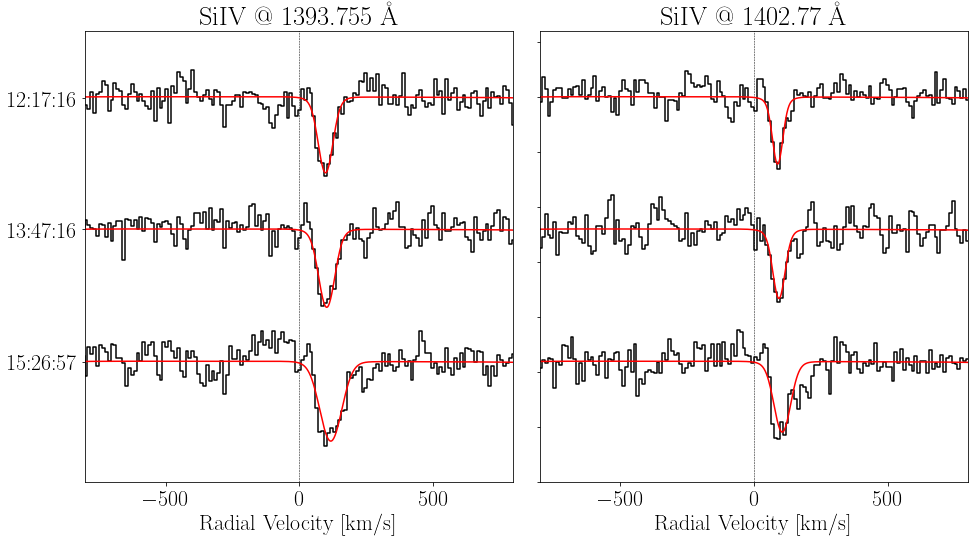

In [24]:
from scipy.optimize import curve_fit

# We list here the lines we wish to study
lines = [1393.7550, 1402.7700]

# Here we list the RV range we wish to model. These numbers must be symetric
#eg. they must have the same distance away from 0 km/s.
g1 = -1000
g2 = 1000


# len(DP) --> number of visits with multiple observations
# 2 --> Number of lines being studied (2 because we are looking at a doublet)
# len(DP[nobs]) --> number of orbits within a visit

# We initialise the arrays.
v_comp = np.zeros(shape=(len(DP),2, len(DP[nobs])))
N = np.zeros(shape=(len(DP),2, len(DP[nobs])))
v_turb = np.zeros(shape=(len(DP),2, len(DP[nobs])))
temp = np.zeros(shape=(len(DP),2, len(DP[nobs])))

v_comp_err = np.zeros(shape=(len(DP),2, len(DP[nobs])))
N_err = np.zeros(shape=(len(DP),2, len(DP[nobs])))
v_turb_err = np.zeros(shape=(len(DP),2, len(DP[nobs])))
temp_err = np.zeros(shape=(len(DP),2, len(DP[nobs])))

diffg = np.zeros(shape=(len(DP),2, len(DP[nobs])))

# Run a loop over the number of visits

for nobs in range(len(DP)):
    
    if nobs == 4:

        print("█▓▒▒░░░ Visit:",nobs,"░░░▒▒▓█")

        w = DP[nobs][0][0]
        
        if param["filenames"]["split_files"] == "yes":
            fig = plt.figure(figsize=(16.0,22.0))
        else:
            fig = plt.figure(figsize=(14,8.0))
        ax1 = plt.subplot(121)
        ax2 = plt.subplot(122)

        ax1.plot([0,0],[-3.2e-12,0.5e-12],'--k',lw=0.5)
        ax2.plot([0,0],[-3.2e-12,0.5e-12],'--k',lw=0.5)

        date = str(DP[nobs][0][3])[:10]

        # The spectrum we are comparing to



        ticks = []
        times = []

        # Select the region which will be used for fitting
        gg1, gg2 = c.RegionSelect(rv, g1, g2)

        # Choose the exocomet free spectrum as a comparison
        rv_bin1, f_bin1 = c.BinXY(rv,ECF,bin_size)


        # Run a loop over the number of lines being explored.
        # In this case the 1393.7550 and 1402.7700 lines
        for j in range(2):

            # Convert to RV space
            rv = c.Wave2RV(w,lines[j],20.5)

            # Note the region user for normalisation
            e1, e2 = c.RegionSelect(rv, n1, n2)

            # Bin the data for visualisation purposes
            rv_bin, f_bin = c.BinXY(rv,DP[nobs][0][1],bin_size)

            # Select the region which will be used for fitting
            gg1, gg2 = c.RegionSelect(rv, g1, g2)

            # Run a loop over each exposure
            for i in range(len(DP[nobs])):

                # We want to separaet the spectra vertically and thus define an offset
                offset = i*1.2e-13#/ 2.5e-13

                # Next spectrum to compare to
                f = DP[nobs][i][1]
                rv_bin, f_bin = c.BinXY(rv,f,bin_size)

                # Calculate the difference between the spectra using the exocomet free spectrum
                diffg = (f-ECF)[gg1:gg2]

                # Calculate the uncestainty on the difference
                diff_err = (np.sqrt(DP[nobs][i][2]**2+ECF_err**2))[gg1:gg2]

                # Define the rv region used for fitting
                w_c = w[gg1:gg2]
                rv_c = c.Wave2RV(w_c,lines[j],20.5)

                try:                   
                    if j == 0:
                        # Create the ticks for the y-axis
                        ticks.append(np.median(ECF[e1:e2]-f[e1:e2])-offset)
                        times.append(str(DP[nobs][i][3])[11:])

                        # Fit the data. p0 are the initial parameters.
                        # [rv_of_feature,log(N),microturbulece,Temperature]
                        # We keep T=10K to avoid degeneracies
                        popt,pcov = curve_fit(m.absorptionSiIV_1,w_c,(diffg/np.median(ECF[e1:e2]))+1.0,\
                                              p0=[100,13.5,30,9.99],bounds=([-300, 11, 1, 9.98], [300, 15, 80, 10]), maxfev = 800)
                        ax1.step(rv_bin,f_bin-f_bin1+np.median(ECF[e1:e2]-f[e1:e2])*np.ones(len(rv_bin))-offset,'-k')
                        ax1.plot(rv_c,(m.absorptionSiIV_1(w_c,*popt)-1.0)*np.median(f[e1:e2])-offset,'-r')

                    if j == 1:
                        popt,pcov = curve_fit(m.absorptionSiIV_2,w_c,(diffg/np.median(ECF[e1:e2]))+1.0,\
                                              p0=[100,13.5,30,9.99],bounds=([-300, 11, 1, 9.98], [300, 15, 80, 10]), maxfev = 800)
                        ax2.step(rv_bin,f_bin-f_bin1+np.median(ECF[e1:e2]-f[e1:e2])*np.ones(len(rv_bin))-offset,'-k')
                        ax2.plot(rv_c,(m.absorptionSiIV_2(w_c,*popt)-1.0)*np.median(f[e1:e2])-offset,'-r')

                    print(popt)

                    # Calculate the uncertainties on the parameters
                    perr = np.sqrt(np.diag(pcov))

                    # Store the fit parameters
                    v_comp[nobs][j][i] = popt[0]
                    N[nobs][j][i] = popt[1]
                    v_turb[nobs][j][i] = popt[2]
                    temp[nobs][j][i] = popt[3]

                    # Store the uncertainties on the parameters
                    v_comp_err[nobs][j][i] = perr[0]
                    N_err[nobs][j][i] = perr[1]
                    v_turb_err[nobs][j][i] = perr[2]
                    temp_err[nobs][j][i] = perr[3] 

                except RuntimeError:

                    print("Not able to fit")

            ax1.title.set_text('SiIV @ '+str(Line1)+' \AA')
            ax1.set_xlim(-800,800)
            if param["filenames"]["split_files"] == "yes":
                ax1.set_ylim(-1.5e-12,6.0e-14)
            else:
                ax1.set_ylim(-3.5e-13,6.0e-14)
            ax1.set_xlabel(r'Radial Velocity [km/s]')
            ax1.set_yticks(ticks) 
            ax1.set_yticklabels(times)

            ax2.title.set_text('SiIV @ '+str(Line2)+' \AA')
            ax2.set_xlim(-800,800)
            if param["filenames"]["split_files"] == "yes":
                ax2.set_ylim(-1.5e-12,6.0e-14)
            else:
                ax2.set_ylim(-3.5e-13,6.0e-14)
            ax2.set_xlabel(r'Radial Velocity [km/s]')
            ax2.set(yticklabels=[]) 
            ax2.set(ylabel=None)  

            fig.tight_layout()
            plt.savefig(home+'/plots/fits/'+date+'_exocomets.pdf', bbox_inches='tight', pad_inches=0.1,dpi=300)

Date: 2017-11-26

	R =  9.2 ± 2.6 R*

	dvdt = 1.7 ± 0.5 m/s^2

	 1393.755
v_comp:	 p_value = 0.176
log(N):	 p_value = 0.15
v_turb:	 p_value = 0.196

	R =  9.8 ± 2.2 R*

	dvdt = 1.5 ± 0.3 m/s^2

	 1402.77
v_comp:	 p_value = 0.138
log(N):	 p_value = 0.076
v_turb:	 p_value = 0.138



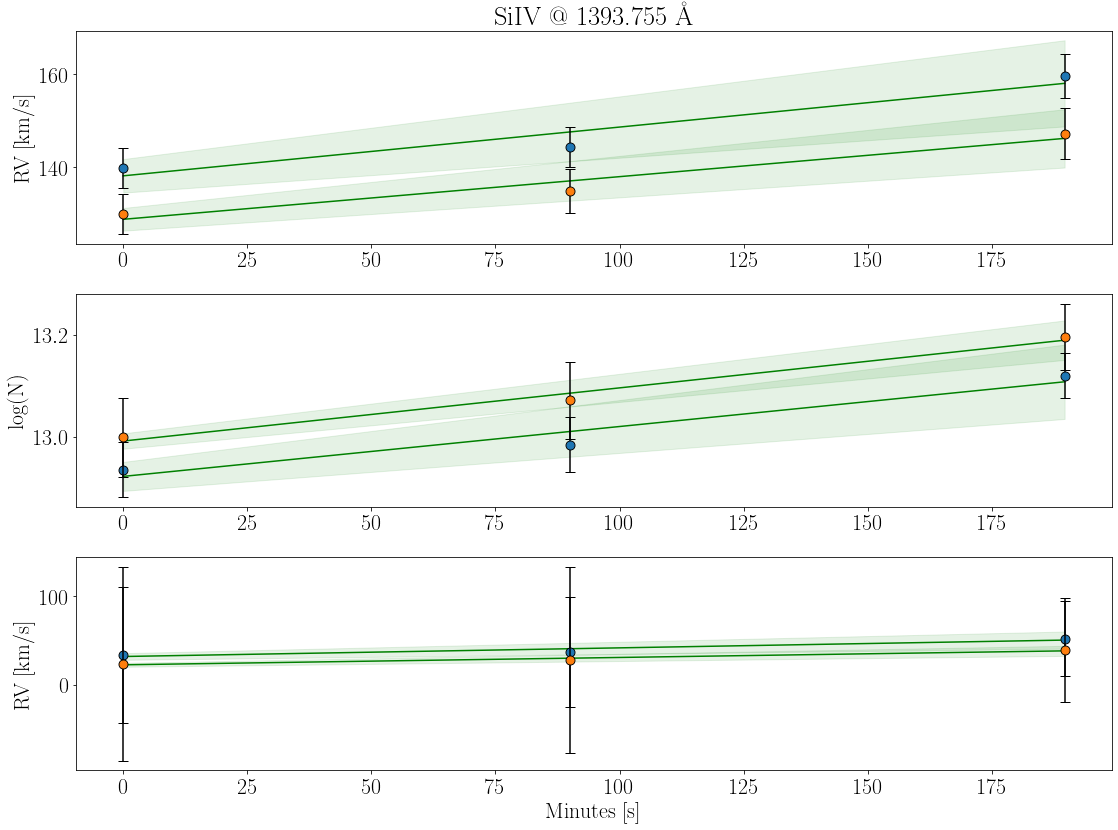

In [26]:
from datetime import timedelta
from scipy.stats import linregress
import datetime
from colorama import Fore, Back, Style

#minutes = np.zeros(shape=(len(DP),len(DP[nobs])))


plotting_params = {'backend': 'wxAgg',
                   'font.family': 'serif',
                   'font.size': 22,
                   'lines.markersize' : 2,
                   'axes.labelsize': 22,
                   'legend.fontsize': 22,
                   'xtick.labelsize': 22,
                   'ytick.labelsize': 22,
                   'text.usetex': True}

plt.rcParams.update(plotting_params)

for nobs in range(len(DP)):
     
    if nobs == 4:

        minutes = []
        date = str(DP[nobs][0][3])[:10]
        print("Date:",date)
        print(32*"=")

        #3 rows and 2 columns
        fig, axes = plt.subplots(3, 1, figsize=(16,12))  

        for i in range(len(DP[nobs])):
            time_sec = (DP[nobs][i][3] - datetime.datetime(1970, 1, 1)).total_seconds()
            #minutes[nobs][i] = time_sec/60 # Convert to minutes
            minutes.append(time_sec/60) # Convert to minutes

        minutes = np.array(minutes)
        #minutes[nobs] = (minutes[nobs]-minutes[nobs][0])
        minutes = minutes-minutes[0]



        for j in range(2):
            res1 = linregress(minutes, v_comp[nobs][j])
            if res1.pvalue < 0.5:
                colour = "green"
                print("\n\tR = ",round(c.RadCalc(res1[0]),1),"±",round(c.RadCalc(res1[0])*(res1.stderr/res1[0]),1),"R*")
                print("\n\tdvdt =",round(res1[0]*(1000/60.),1),"±",round(res1.stderr*(1000/60.),1),"m/s^2")
            else:
                colour = "red"
            axes[0].fill_between(minutes,(res1.slope+res1.stderr)*minutes+res1.intercept+res1.intercept_stderr,(res1.slope-res1.stderr)*minutes+res1.intercept-res1.intercept_stderr,color=colour,alpha=0.1)
            axes[0].plot(minutes,res1.slope*minutes+res1.intercept,color=colour)
            axes[0].errorbar(minutes,v_comp[nobs][j],yerr=v_comp_err[nobs][j],capsize=5,ls="None",color="black")
            axes[0].scatter(minutes,v_comp[nobs][j],s=80,zorder=2,color="black")
            axes[0].scatter(minutes,v_comp[nobs][j],s=50,zorder=2,label="Absorption depth")

            res2 = linregress(minutes, N[nobs][j])
            if res2.pvalue < 0.5:
                colour = "green"
            else:
                colour = "red"
            axes[1].fill_between(minutes,(res2.slope+res2.stderr)*minutes+res2.intercept+res2.intercept_stderr,(res2.slope-res2.stderr)*minutes+res2.intercept-res2.intercept_stderr,color=colour,alpha=0.1)
            axes[1].plot(minutes,res2.slope*minutes+res2.intercept,color=colour)
            axes[1].errorbar(minutes,N[nobs][j],yerr=N_err[nobs][j],capsize=5,ls="None",color="black")
            axes[1].scatter(minutes,N[nobs][j],s=80,zorder=2,color="black")
            axes[1].scatter(minutes,N[nobs][j],s=50,zorder=2,label="Absorption depth")    

            res3 = linregress(minutes, v_turb[nobs][j])
            if res3.pvalue < 0.5:
                colour = "green"
            else:
                colour = "red"
            axes[2].fill_between(minutes,(res3.slope+res3.stderr)*minutes+res3.intercept+res3.intercept_stderr,(res3.slope-res3.stderr)*minutes+res3.intercept-res3.intercept_stderr,color=colour,alpha=0.1)
            axes[2].plot(minutes,res3.slope*minutes+res3.intercept,color=colour)
            axes[2].errorbar(minutes,v_turb[nobs][j],yerr=v_turb_err[nobs][j],capsize=5,ls="None",color="black")
            axes[2].scatter(minutes,v_turb[nobs][j],s=80,zorder=2,color="black")
            axes[2].scatter(minutes,v_turb[nobs][j],s=50,zorder=2,label="Absorption depth")    

            print("\n\t",lines[j])
            if res1.pvalue < 0.05:
                print(Back.GREEN + 'v_comp:\t p_value =',round(res1.pvalue,3),Style.RESET_ALL)
            else:
                print('v_comp:\t p_value =',round(res1.pvalue,3))
            if res2.pvalue < 0.05:
                print(Back.GREEN + 'log(N):\t p_value =',round(res2.pvalue,3),Style.RESET_ALL)
            else:
                print('log(N):\t p_value =',round(res2.pvalue,3))
            if res3.pvalue < 0.05:
                print(Back.GREEN + 'v_turb:\t p_value =',round(res3.pvalue,3),Style.RESET_ALL)
            else:
                print('v_turb:\t p_value =',round(res3.pvalue,3))

            #with open(home+'/data/variations_'+date+'.txt', 'w') as output:
            #    output.write('Amplitude:\t p_value = '+str(round(res1.pvalue,3))+'\n')

        axes[0].set_ylabel(r'RV [km/s]')
        axes[0].title.set_text('SiIV @ '+str(Line1)+' \AA')
        #axes[0][1].title.set_text('SiIV @ '+str(Line2)+' \AA')
        axes[1].set_ylabel(r'log(N)')
        axes[2].set_ylabel(r'RV [km/s]')
        axes[2].set_xlabel(r'Minutes [s]')
        #axes[2][1].set_xlabel(r'Minutes [s]')
        fig.tight_layout()
        plt.savefig(home+'/plots/trends/'+date+'_fit_parameters.pdf', bbox_inches='tight', pad_inches=0.1,dpi=300)
        print(32*"=","\n")